In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import astropy.units as u

In [431]:
# Uses the velocity curve from https://arxiv.org/pdf/1810.04445.pdf
def vel_func(R, Theta):
    rin = 0.9
    Ro = 35.8
    V0 = 296
    return V0/R * (Ro-rin+np.sqrt(rin**2+R**2) - np.sqrt(Ro**2+R**2))

In [432]:
#Defining Variables

r = np.arange(0.1,10,0.1)
phi = np.arange(0,2*np.pi+0.03,0.02)
 
R, Phi = np.meshgrid(r, phi)

vel = vel_func(R,Phi)

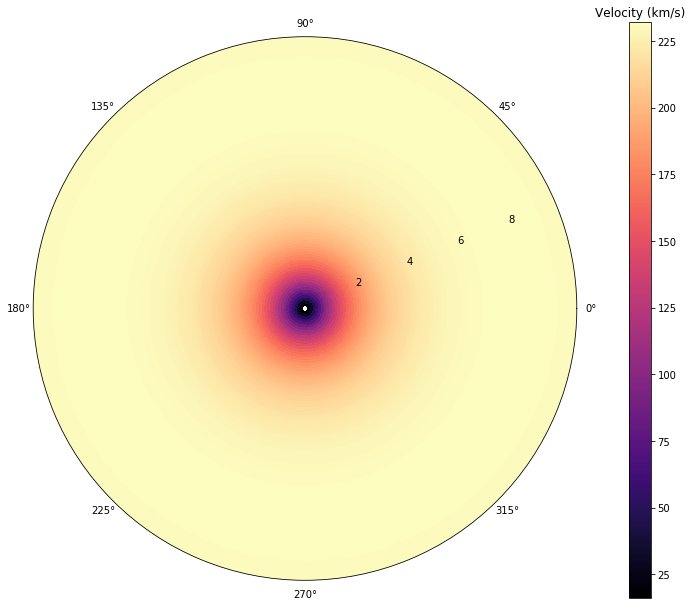

In [433]:
# Plotting the 2-D RV motion for the Milky Way

vel = np.nan_to_num(vel)
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'), figsize=[10,10])

ax.pcolormesh(Phi,R,vel,vmin=vel.min(), vmax=vel.max(), cmap='magma')

cNorm = mpl.colors.Normalize(vmin=vel.min(), vmax=vel.max())
ax3 = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb1 = mpl.colorbar.ColorbarBase(ax3, norm=cNorm, cmap='magma')
cb1.ax.set_title("Velocity (km/s)")
fig.subplots_adjust(left=0.05,right=0.85)
plt.show()

In [434]:
rel_vel = np.zeros_like(vel)
for i,phi_temp in enumerate(np.arange(0,2*np.pi+0.03,0.02)):
    factor = 1
    # Making velocities negative for when phi is obtuse
    if phi_temp>np.pi:
        phi_temp = 2*np.pi-phi_temp
        factor = -1.0*factor
    #Converting from Gal velocity to velocity assuming reference point is at (-8.34) kpc (https://www.aanda.org/articles/aa/pdf/2019/02/aa33273-18.pdf)
    for j, r_temp in enumerate(np.arange(0.1,10,0.1)):
        temp_vel = vel_func(r_temp,phi_temp)
        R2 = np.sqrt(r_temp**2+(-8.34)**2-2*r_temp*(-8.34)*np.cos(phi_temp))
        theta = np.arccos(((-8.34)**2+R2**2-r_temp**2)/(2*(-8.34)*R2))
        rel_vel[i][j] = (temp_vel - 220)*np.cos(theta+phi_temp-np.pi/2)*factor

/home/kennedy/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in arccos
  if sys.path[0] == '':


In [470]:
# Defining objects using Galactic coords from Earth and various distances to see what
#their bulk velocity should be


RA_obj = ((344)*2*np.pi)/360
d_obj = -4.8
gal_dist_1 = np.sqrt(d_obj**2+(-8.34)**2-2*d_obj*(-8.34)*np.cos(RA_obj))
gal_angle_1 = np.arccos(((-8.34)**2+gal_dist**2-d_obj**2)/(2*(-8.34)*gal_dist))
if RA_obj > np.pi:
    gal_angle_1 = 2*np.pi-gal_angle_1

d_obj = -7.5
gal_dist_2 = np.sqrt(d_obj**2+(-8.34)**2-2*d_obj*(-8.34)*np.cos(RA_obj))
gal_angle_2 = np.arccos(((-8.34)**2+gal_dist**2-d_obj**2)/(2*(-8.34)*gal_dist))
if RA_obj > np.pi:
    gal_angle_2 = 2*np.pi-gal_angle_2

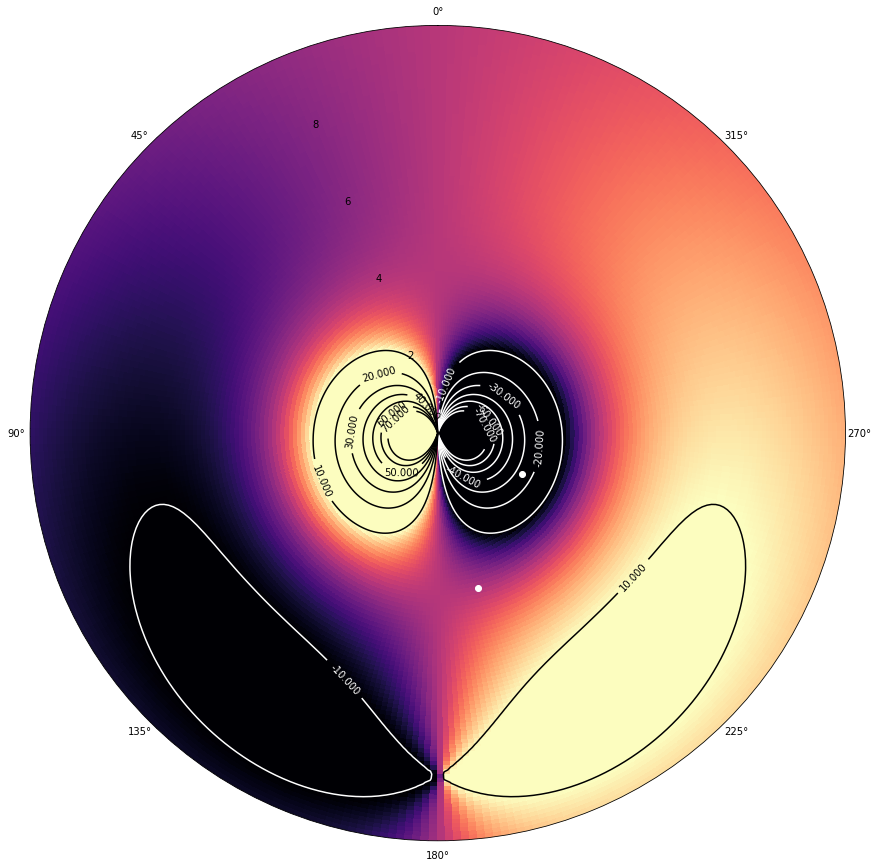

In [472]:
rel_vel = np.nan_to_num(rel_vel)
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'), figsize=[15,15])

ax.pcolormesh(Phi,R,rel_vel,vmin=-10, vmax=10, cmap='magma')
ax.set_theta_zero_location("N")
ax.scatter(gal_angle_1,gal_dist_1,color='w')
ax.scatter(gal_angle_2,gal_dist_2,color='w')

levels = np.arange(-70,0,10)
CS = ax.contour(Phi,R,rel_vel, levels=levels, colors='w', linestyles='-')
ax.clabel(CS, inline=1, fontsize=10)

levels = np.arange(10,80,10)
CS = ax.contour(Phi,R,rel_vel, levels=levels, colors='k', linestyles='-')
ax.clabel(CS, inline=1, fontsize=10)
plt.show()